# Explore here

In [23]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from pickle import dump


In [3]:
#IMPORTAR DATOS
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df= pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
#SELECCIONAR COLUMNAS 
df= df[["MedInc","Latitude", "Longitude"]]
df.shape

(20640, 3)

In [5]:
#TRABAJAR DATOS 
len(df.isna())
#No hay nas



20640

In [6]:
#TRAIN Y TEST
X= df
X_train, X_test = train_test_split(X,test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [7]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


In [8]:
#INSTANCIA EN KMEANS CON 6 CLUSTER 
model= KMeans(n_clusters=6, random_state=42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [9]:
#CREAR UNA NUEVA COLUMNA CLUSTER
clusters= model.labels_
clusters
X_train["clusters"]= clusters
X_train.head()

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [10]:
#DAR VALOR A LA Y TRAIN PARA PODER HACER PRED POSTERIOR
y_train = X_train["clusters"]
y_train.head()

14196    3
8267     1
17445    1
14265    3
2271     5
Name: clusters, dtype: int32

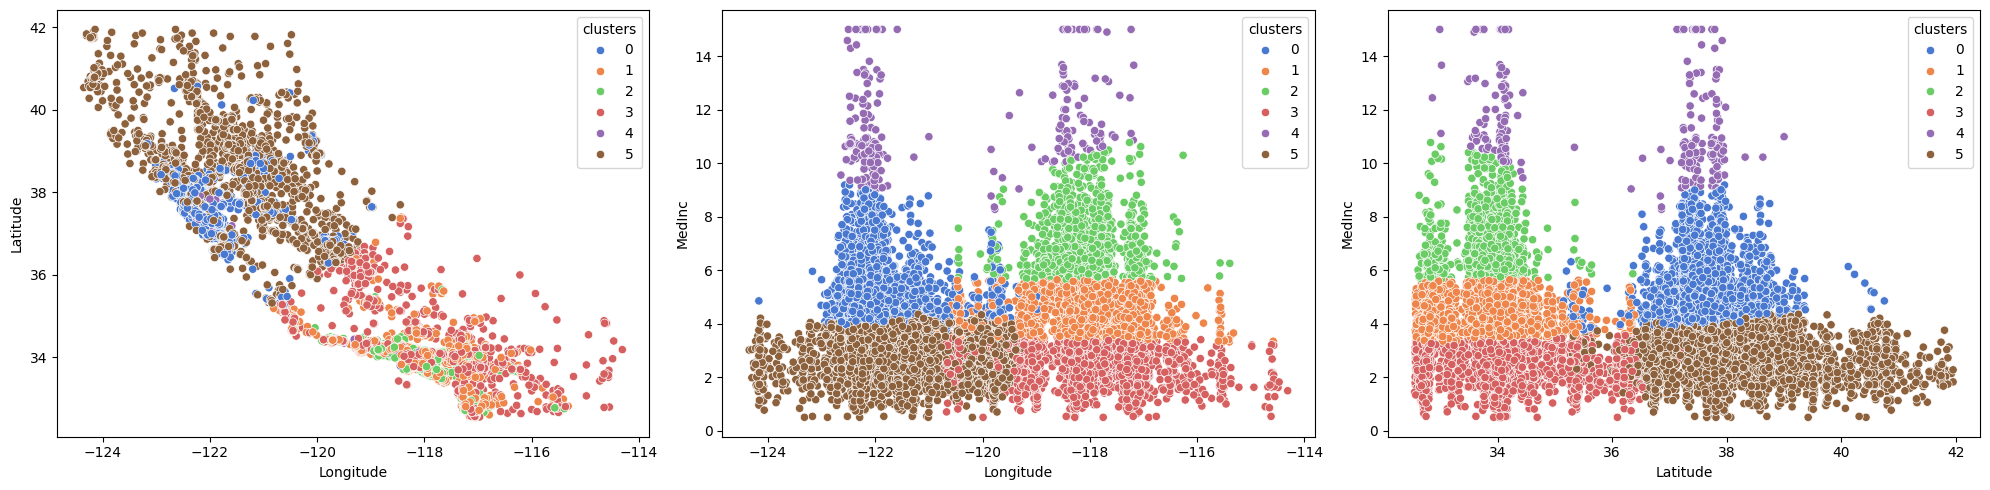

In [11]:
#GRAFICAR LONG. LAT E INGRESOS PARA VER LOS CLUSTERS 
fig, axis = plt.subplots(1,3, figsize= (20,5))

sn.scatterplot(ax= axis[0], data= X_train, x="Longitude", y= "Latitude", hue="clusters", palette= "muted")
sn.scatterplot(ax= axis[1], data= X_train, x="Longitude", y= "MedInc", hue="clusters", palette= "muted")
sn.scatterplot(ax= axis[2], data= X_train, x="Latitude", y= "MedInc", hue="clusters", palette= "muted")
plt.tight_layout()
plt.show()

Parece que el clustering es más correcto cuando entra en juego la variable económica, con más peso que la geográfica. 

In [12]:
#PREDECIR CON TEST
test= model.predict(X_test)
X_test["clusters"]= test
X_test.head()

,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


In [21]:
y_test= X_test["clusters"]

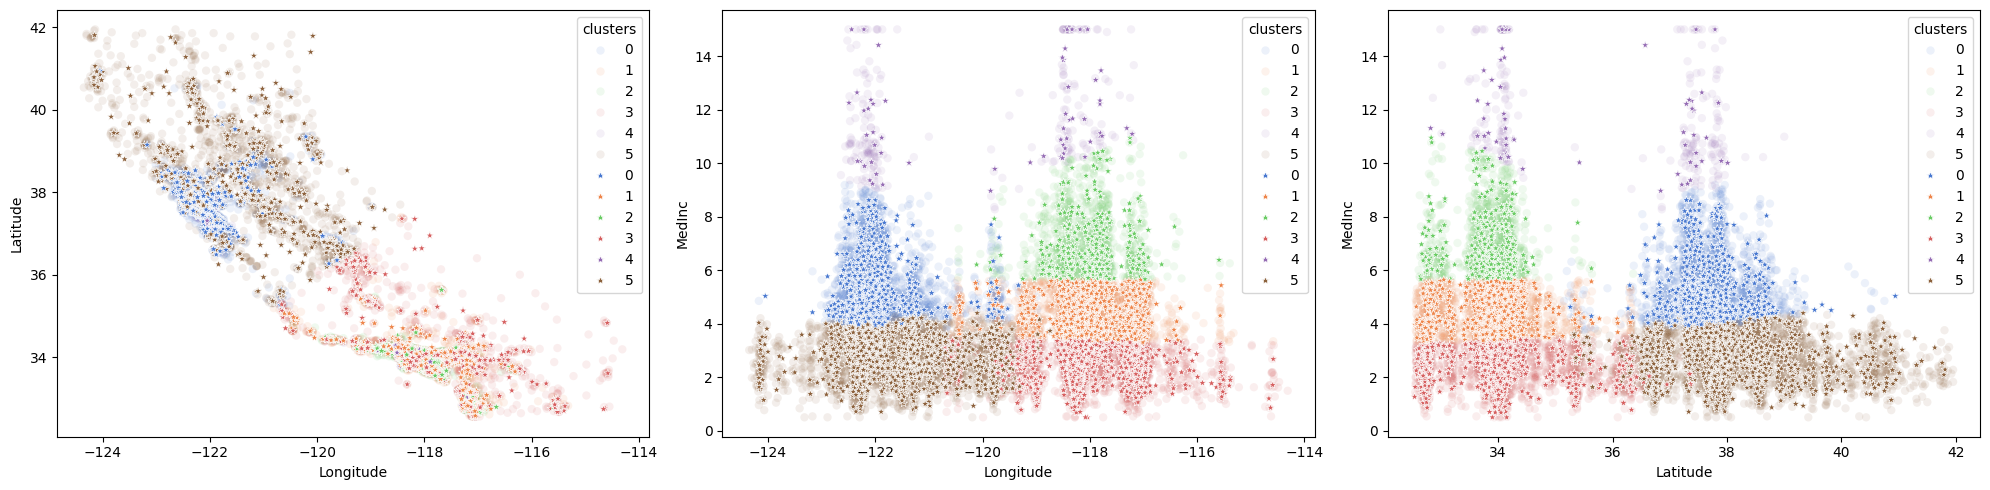

In [13]:
fig, axis = plt.subplots(1,3, figsize= (20,5))

sn.scatterplot(ax= axis[0], data= X_train, x="Longitude", y= "Latitude", hue="clusters", palette= "muted", alpha= 0.1)
sn.scatterplot(ax= axis[1], data= X_train, x="Longitude", y= "MedInc", hue="clusters", palette= "muted", alpha= 0.1)
sn.scatterplot(ax= axis[2], data= X_train, x="Latitude", y= "MedInc", hue="clusters", palette= "muted", alpha= 0.1)

sn.scatterplot(ax= axis[0], data= X_test, x="Longitude", y= "Latitude", hue="clusters", palette= "muted", marker= "*")
sn.scatterplot(ax= axis[1], data= X_test, x="Longitude", y= "MedInc", hue="clusters", palette= "muted", marker= "*")
sn.scatterplot(ax= axis[2], data= X_test, x="Latitude", y= "MedInc", hue="clusters", palette= "muted", marker= "*")

plt.tight_layout()
plt.show()


El modelo de predicción parece bastante preciso.

In [14]:
#IMPLEMENTACION DE ARBOL DE DECISIÓN PARA CLASIFICAR SEGÚN CLUSTER 
modelo = DecisionTreeClassifier(random_state = 42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

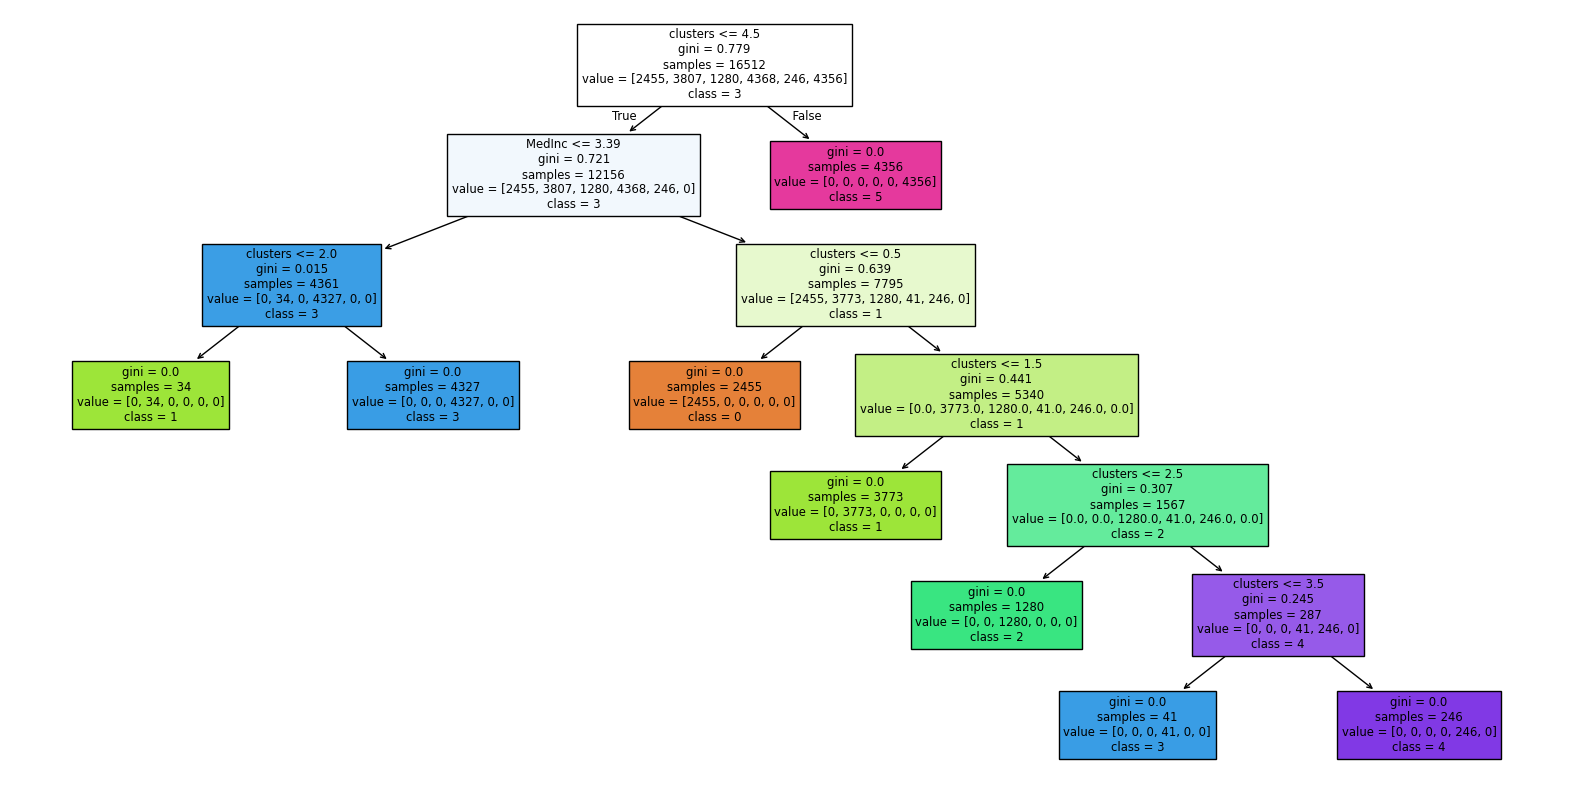

In [15]:
fig = plt.figure(figsize=(20,10))

tree.plot_tree(modelo, feature_names = X_train.columns, class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [16]:
param_grid = {"criterion": ["gini", "entropy"],"max_depth": [3, 5, 10, None],"min_samples_split": [2, 5, 10],"min_samples_leaf": [1, 2, 4]}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
#OPTIMIZACIÓN
modelo_opti= DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, random_state = 42)
modelo_opti.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

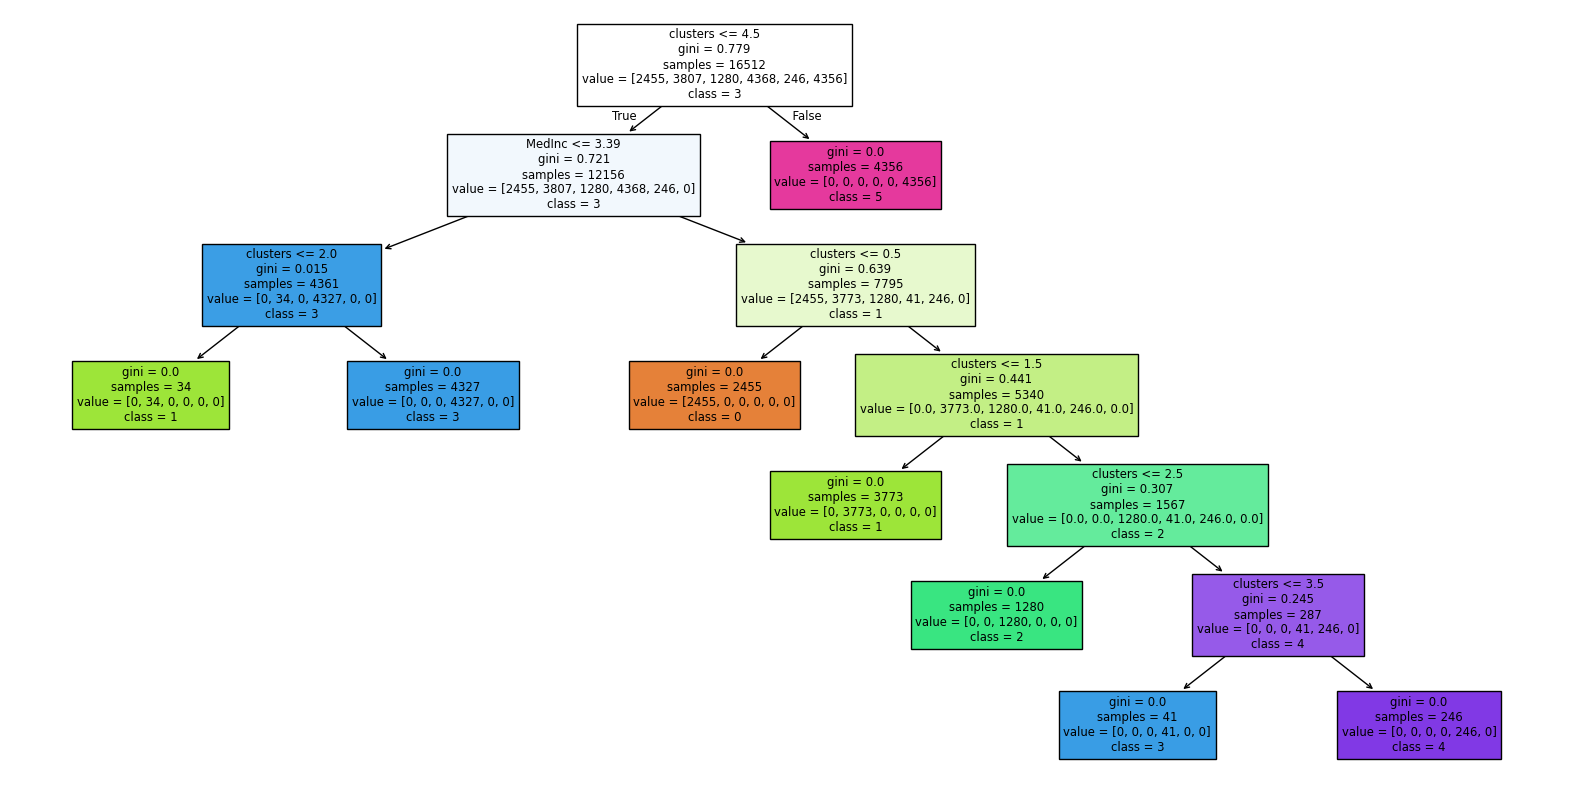

In [18]:
fig = plt.figure(figsize=(20,10))

tree.plot_tree(modelo_opti, feature_names = X_train.columns, class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [19]:
y_pred= modelo_opti.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [22]:
#ACCURACY
accuracy_score(y_test, y_pred)

#Modelo "perfecto", aunque creo que es mejor tener una accuracy entre 0.8 y 0.9 a 1, y más en este caso que hay bastantes datos <1000

1.0

In [26]:
#GUARDADO

dump(modelo_opti, open("../models/decissiontree.sav", "wb"))
